In [3]:
import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})


In [12]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [13]:
T = pd.read_csv('../TOST_data/average_properties.txt',sep='\t',index_col=0,na_values=-99)

Total number of measurements: 764
Measurements with 100 < PR < 160: 740 (97 %)
Measurenment with PR <= 100: 17 (2 %)
Measurenment with PR >= 160: 7 (1 %)


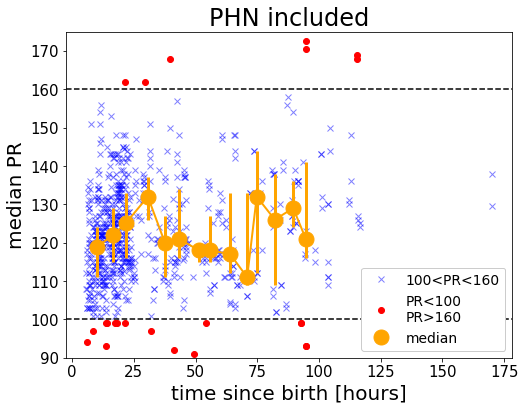

In [72]:
plt.figure(figsize=(8,6))

#v1 = T['DELTA_SEC_MEASURE'][T['PHN']==False]/60./60.
#v2 = T['MED_PR'][T['PHN']==False]
v1 = T['DELTA_SEC_MEASURE']/60./60.
v2 = T['MED_PR']

plt.plot(v1[(v2<160)&(v2>100)],v2[(v2<160)&(v2>100)],"xb",label='100<PR<160',alpha=0.5)
plt.plot(v1[(v2>=160)|(v2<=100)],v2[(v2>=160)|(v2<=100)],"or",label='PR<100\nPR>160')

plt.axhline(100,ls='dashed',color='k')
plt.axhline(160,ls='dashed',color='k')


xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6.0,100,14)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median',zorder=11)
plt.plot(xx,yy,color="orange",lw=2)

print('Total number of measurements: %i'%len(v2))
print('Measurements with 100 < PR < 160: %i (%.0f %%)'%(len(v1[(v2<160)&(v2>100)]),len(v1[(v2<160)&(v2>100)])/len(v2)*100))
print('Measurenment with PR <= 100: %i (%.0f %%)'%(len(v2[v2<=100]),len(v2[v2<=100])/len(v2)*100))
print('Measurenment with PR >= 160: %i (%.0f %%)'%(len(v2[v2>=160]),len(v2[v2>=160])/len(v2)*100))



#plt.xlim(10,1000)
plt.ylim(90,175)
plt.xlabel('time since birth [hours]')
plt.ylabel('median PR')
plt.legend(loc=4,fontsize='x-small',framealpha=1,fancybox=True)
#plt.title('Heart rates in healthy babies')
plt.title('PHN included')
plt.show()

Total number of measurements: 572
Measurements with 100 < PR < 160: 559 (98 %)
Measurenment with PR <= 100: 10 (2 %)
Measurenment with PR >= 160: 3 (1 %)


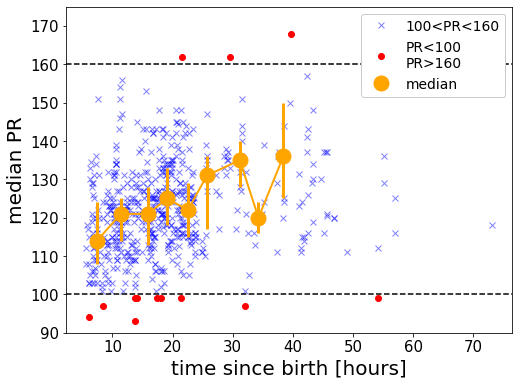

In [76]:
# NO PHN

plt.figure(figsize=(8,6))

v1 = T['DELTA_SEC_MEASURE'][T['PHN']==False]/60./60.
v2 = T['MED_PR'][T['PHN']==False]


plt.plot(v1[(v2<160)&(v2>100)],v2[(v2<160)&(v2>100)],"xb",label='100<PR<160',alpha=0.5)
plt.plot(v1[(v2>=160)|(v2<=100)],v2[(v2>=160)|(v2<=100)],"or",label='PR<100\nPR>160')

plt.axhline(100,ls='dashed',color='k')
plt.axhline(160,ls='dashed',color='k')

print('Total number of measurements: %i'%len(v2))
print('Measurements with 100 < PR < 160: %i (%.0f %%)'%(len(v1[(v2<160)&(v2>100)]),len(v1[(v2<160)&(v2>100)])/len(v2)*100))
print('Measurenment with PR <= 100: %i (%.0f %%)'%(len(v2[v2<=100]),len(v2[v2<=100])/len(v2)*100))
print('Measurenment with PR >= 160: %i (%.0f %%)'%(len(v2[v2>=160]),len(v2[v2>=160])/len(v2)*100))

xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6.0,40,9)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median',zorder=11)
plt.plot(xx,yy,color="orange",lw=2)


#plt.xlim(10,1000)
plt.ylim(90,175)
plt.xlabel('time since birth [hours]')
plt.ylabel('median PR')
plt.legend(loc=1,fontsize='x-small',framealpha=1,fancybox=True)
#plt.title('Heart rates in healthy babies')
plt.show()

In [37]:
#pr,spo2,med_pr,med_spo2 = np.loadtxt('../TOST_data/total_datapoints.txt.txt',unpack=True)
pr, spo2, pi, med_pr, med_spo2, med_pi, deltasec = np.loadtxt('../TOST_data/total_datapoints_deltasec_pi.txt',unpack=True)

delta_hours = deltasec/60./60.

#good_val = np.where(((PR_TOT>10.)&(SPO2_TOT>10)&(PI_TOT>0.000001)&(PI_TOT<100)))
sel = np.where(((pr>10.)&(spo2>10)))

pr   = np.array(pr[sel])
spo2   = np.array(spo2[sel])
pi   = np.array(pi[sel])
med_pr   = np.array(med_pr[sel])
med_spo2   = np.array(med_spo2[sel])
med_pi   = np.array(med_pi[sel])
deltasec   = np.array(deltasec[sel])
delta_hours   = np.array(delta_hours[sel])


# Measurements outside range

In [128]:
names100 = (T['BABY_IDS'][((T['PHN']==False) & (T['MED_PR']<100))])
names100 =  np.array(names100)
names100

array(['FMC013', 'FMC030', 'RGH010', 'FMC072', 'FMC072', 'PLC 028',
       'FMC133', 'PLC044', 'PLC 049', 'PLC 049'], dtype=object)

In [114]:
files100 = list(map(str,T['FILE'][((T['PHN']==False) & (T['MED_PR']<100))]))
files100

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 013/G_FMC013_Day1_Lt foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 030/G_FMC030_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST RGH Data Groomed/G_RGH 010/G_RGH010_Day1_Lt foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Wrist.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day2_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_133/G_FMC133_Day1_Rt Wrist.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 044/G_PLC 044_Rt Wrist_Day1.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 049/G_PLC 049_Rt Leg_Day1.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 049/G_PLC 049_Rt Wrist_Day2.csv']

In [129]:
names160 = T['BABY_IDS'][((T['PHN']==False) & (T['MED_PR']>160))]
names160 = np.array(names160)
names160

array(['PLC025', 'PLC 035', 'PLC058'], dtype=object)

In [117]:
files160 = list(map(str,T['FILE'][((T['PHN']==False) & (T['MED_PR']>160))]))
files160

['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC025/G_PLC025_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC035/G_PLC035_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt Leg_Day2.csv']

In [138]:
for nm in names160:
    b = baby(nm)
    print(b.files)
    print('\n')

['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC025/G_PLC025_Day1_Rt Foot.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC025/G_PLC025_Day1_Rt Wrist.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC035/G_PLC035_Day1_Rt Foot.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC035/G_PLC035_Day1_Rt Wrist.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt Leg_Day1.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt Leg_Day2.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt Wrist_Day1.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt wrist_Day2.csv']




In [139]:
fl_idx_160 = [0, 0, 1]

In [120]:
for nm in names100:
    b = baby(nm)
    print(b.files)
    print('\n')

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 013/G_FMC013_Day1_Lt foot.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 030/G_FMC030_Day1_Rt Foot.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST RGH Data Groomed/G_RGH 010/G_RGH010_Day1_Lt foot.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST RGH Data Groomed/G_RGH 010/G_RGH010_Day1_Rt Wrist.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Foot.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Wrist.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Foot.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Wrist.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day1_Rt Foot.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day1_Rt Wrist.csv', '/home/giorg

In [121]:
fl_idx_100 = [0, 0, 0, 0, 1, 2, 1, 1, 0, 3]

In [122]:
len(fl_idx_100)

10

In [123]:
len(names100)

10

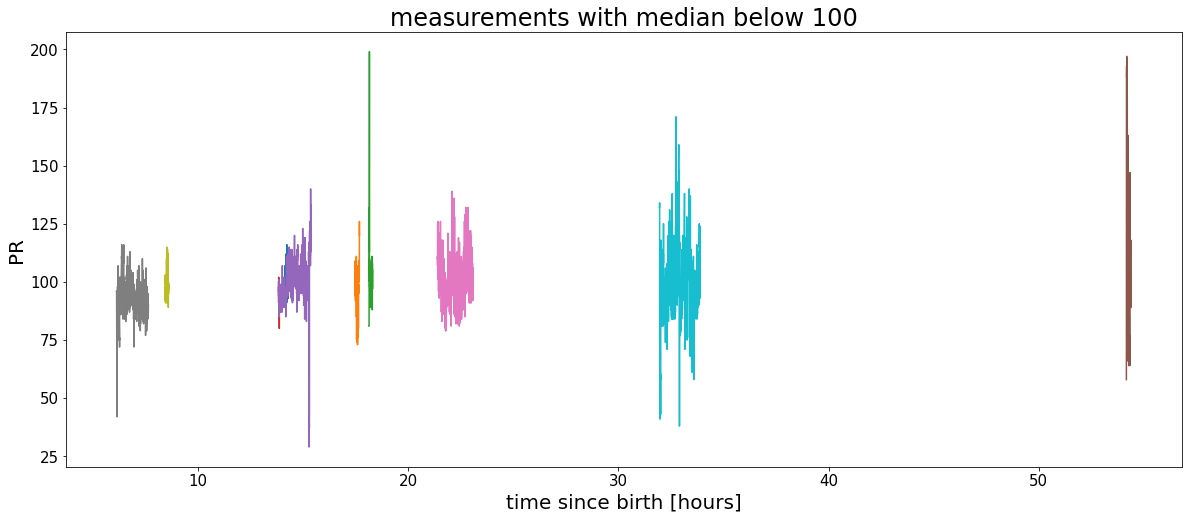

In [135]:
plt.figure(figsize=(20,8))
for i in range(len(names100)):
    b = baby(names100[i])
    sel = np.where(b.measurements[fl_idx_100[i]]['PR']>10.)
    plt.plot(np.array(b.measurements_dt[fl_idx_100[i]])[sel]/60./60.,np.array(b.measurements[fl_idx_100[i]]['PR'])[sel])

plt.title('measurements with median below 100')
plt.xlabel('time since birth [hours]')
plt.ylabel('PR')
plt.show()

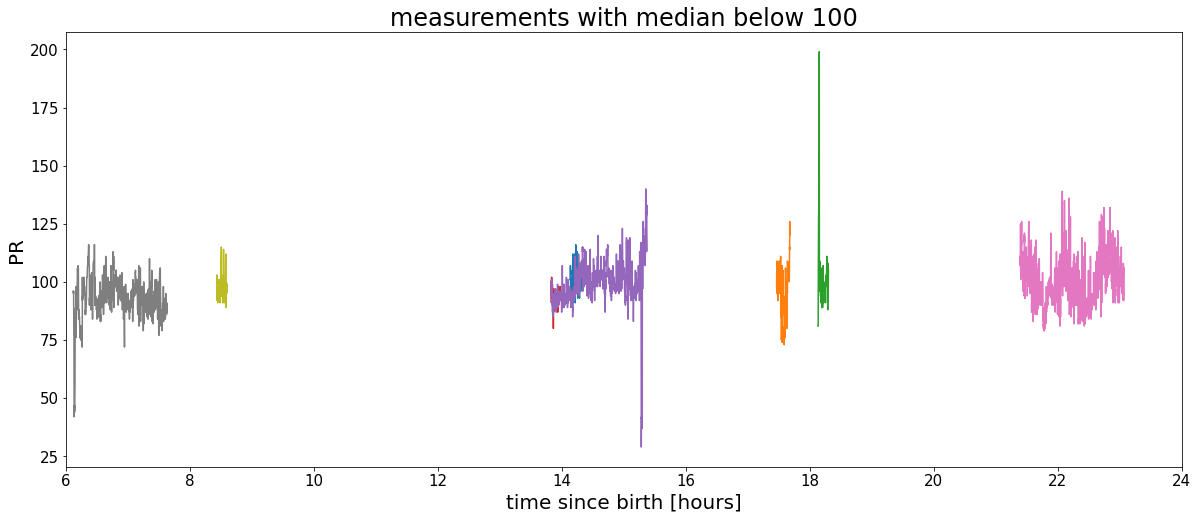

In [137]:
# same but zoom in
plt.figure(figsize=(20,8))
for i in range(len(names100)):
    b = baby(names100[i])
    sel = np.where(b.measurements[fl_idx_100[i]]['PR']>10.)
    plt.plot(np.array(b.measurements_dt[fl_idx_100[i]])[sel]/60./60.,np.array(b.measurements[fl_idx_100[i]]['PR'])[sel])

plt.title('measurements with median below 100')
plt.xlabel('time since birth [hours]')
plt.ylabel('PR')
plt.xlim(6,24)
plt.show()

## babies above 160

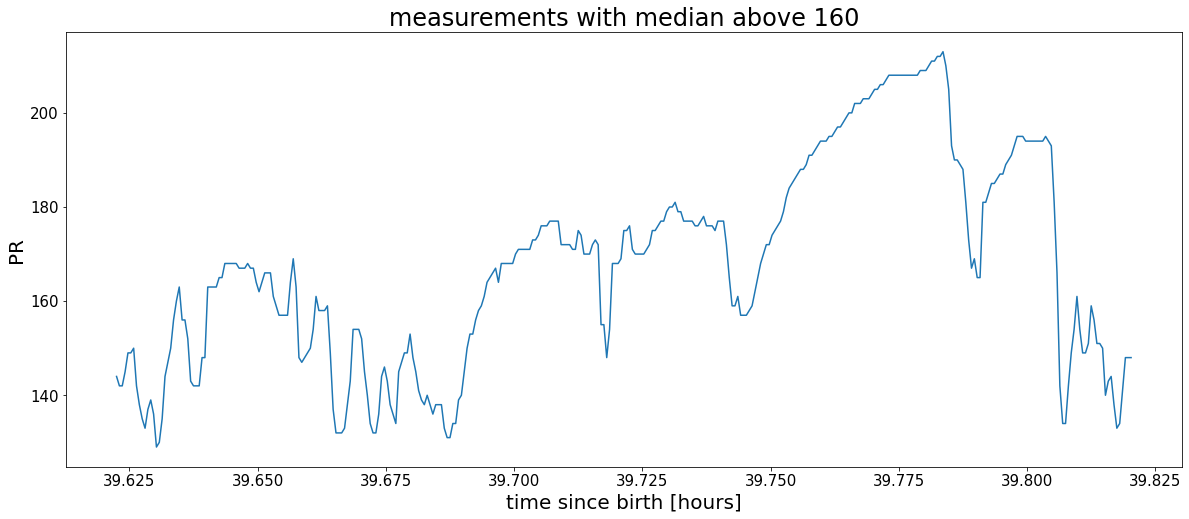

In [145]:
plt.figure(figsize=(20,8))
#for i in range(len(names160)):
for i in range(1):
    i =i+2
    b = baby(names160[i])
    sel = np.where(b.measurements[fl_idx_160[i]]['PR']>10.)
    plt.plot(np.array(b.measurements_dt[fl_idx_160[i]])[sel]/60./60.,np.array(b.measurements[fl_idx_160[i]]['PR'])[sel])

plt.title('measurements with median above 160')
plt.xlabel('time since birth [hours]')
plt.ylabel('PR')
plt.show()

# plotting all the datapoints

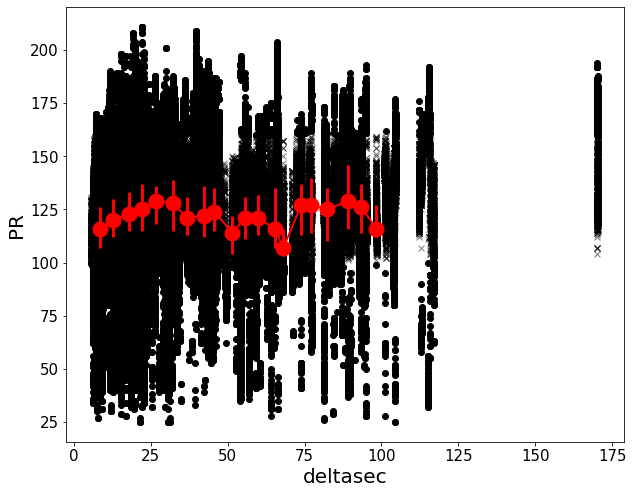

In [45]:
plt.figure(figsize=(10,8))
#plt.plot(delta_hours,pr,".",alpha=0.7)

plt.plot(delta_hours[(pr<160)&(pr>100)],pr[(pr<160)&(pr>100)],"xk",label='100<PR<160',alpha=0.5)
plt.plot(delta_hours[(pr>=160)|(pr<=100)],pr[(pr>=160)|(pr<=100)],"ok",label='PR<100\nPR>160')


xx,yy,ey1,ey2 = median_in_bins_err(delta_hours,pr,6.0,100,20)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',label ='median',zorder=11)
plt.plot(xx,yy,color="red",lw=2)

#plt.ylim(95,130)
plt.xlabel('deltasec')

plt.ylabel('PR')
plt.show()

Total number of measurements: 913987
Measurements with 100 < PR < 160: 841325 (92 %)
Measurenment with PR <= 100: 54730 (6 %)
Measurenment with PR >= 160: 17932 (2 %)


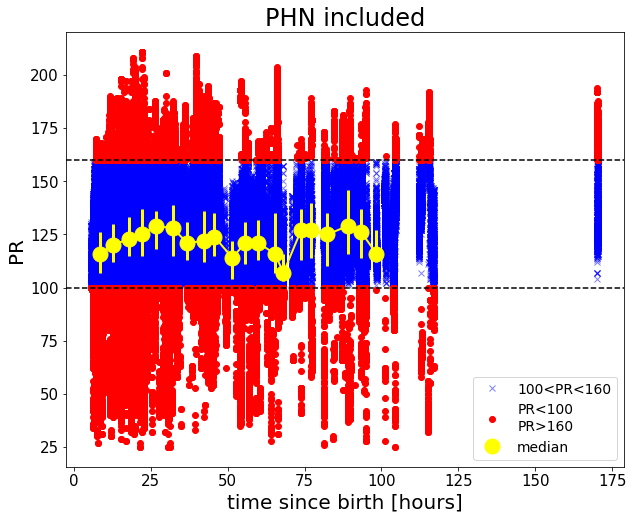

In [71]:
plt.figure(figsize=(10,8))
#plt.plot(delta_hours,pr,".",alpha=0.7)

plt.plot(delta_hours[(pr<160)&(pr>100)],pr[(pr<160)&(pr>100)],"xb",label='100<PR<160',alpha=0.5)
plt.plot(delta_hours[(pr>=160)|(pr<=100)],pr[(pr>=160)|(pr<=100)],"or",label='PR<100\nPR>160')

print('Total number of measurements: %i'%len(pr))
print('Measurements with 100 < PR < 160: %i (%.0f %%)'%(len(pr[(pr<160)&(pr>100)]),len(pr[(pr<160)&(pr>100)])/len(pr)*100))
print('Measurenment with PR <= 100: %i (%.0f %%)'%(len(pr[pr<=100]),len(pr[pr<=100])/len(pr)*100))
print('Measurenment with PR >= 160: %i (%.0f %%)'%(len(pr[pr>=160]),len(pr[pr>=160])/len(pr)*100))


xx,yy,ey1,ey2 = median_in_bins_err(delta_hours,pr,6.0,100,20)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='yellow',label ='median',zorder=11)
plt.plot(xx,yy,color="yellow",lw=2)

plt.axhline(100,ls='dashed',color='k')
plt.axhline(160,ls='dashed',color='k')

#plt.ylim(95,130)
plt.xlabel('time since birth [hours]')

plt.title('PHN included')
plt.legend(fontsize='x-small')
plt.ylabel('PR')
plt.show()

In [79]:
# NO PHN datapoints
NP_pr, NP_spo2, NP_pi, NP_med_pr, NP_med_spo2, NP_med_pi, NP_deltasec = np.loadtxt('../TOST_data/total_datapoints_deltasec_pi_NOPHN.txt',unpack=True)

NP_delta_hours = NP_deltasec/60./60.

#good_val = np.where(((PR_TOT>10.)&(SPO2_TOT>10)&(PI_TOT>0.000001)&(PI_TOT<100)))
sel = np.where(((NP_pr>10.)&(NP_spo2>10)))

NP_pr           = np.array(NP_pr[sel])
NP_spo2         = np.array(NP_spo2[sel])
NP_pi           = np.array(NP_pi[sel])
NP_med_pr       = np.array(NP_med_pr[sel])
NP_med_spo2     = np.array(NP_med_spo2[sel])
NP_med_pi       = np.array(NP_med_pi[sel])
NP_deltasec     = np.array(NP_deltasec[sel])
NP_delta_hours  = np.array(NP_delta_hours[sel])

Total number of measurements: 794290
Measurements with 100 < PR < 160: 736691 (93 %)
Measurenment with PR <= 100: 43787 (6 %)
Measurenment with PR >= 160: 13812 (2 %)


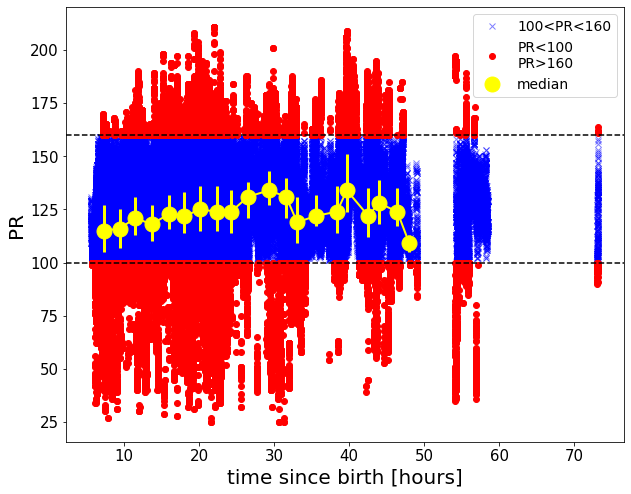

In [83]:
plt.figure(figsize=(10,8))
#plt.plot(delta_hours,pr,".",alpha=0.7)

plt.plot(NP_delta_hours[(NP_pr<160)&(NP_pr>100)],NP_pr[(NP_pr<160)&(NP_pr>100)],"xb",label='100<PR<160',alpha=0.5)
plt.plot(NP_delta_hours[(NP_pr>=160)|(NP_pr<=100)],NP_pr[(NP_pr>=160)|(NP_pr<=100)],"or",label='PR<100\nPR>160')

print('Total number of measurements: %i'%len(NP_pr))
print('Measurements with 100 < PR < 160: %i (%.0f %%)'%(len(NP_pr[(NP_pr<160)&(NP_pr>100)]),len(NP_pr[(NP_pr<160)&(NP_pr>100)])/len(NP_pr)*100))
print('Measurenment with PR <= 100: %i (%.0f %%)'%(len(NP_pr[NP_pr<=100]),len(NP_pr[NP_pr<=100])/len(NP_pr)*100))
print('Measurenment with PR >= 160: %i (%.0f %%)'%(len(NP_pr[NP_pr>=160]),len(NP_pr[NP_pr>=160])/len(NP_pr)*100))


xx,yy,ey1,ey2 = median_in_bins_err(NP_delta_hours,NP_pr,6.0,50,20)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='yellow',label ='median',zorder=11)
plt.plot(xx,yy,color="yellow",lw=2)

plt.axhline(100,ls='dashed',color='k')
plt.axhline(160,ls='dashed',color='k')

#plt.ylim(95,130)
plt.xlabel('time since birth [hours]')

#plt.title('NO PHN')
plt.legend(fontsize='x-small')
plt.ylabel('PR')
plt.show()

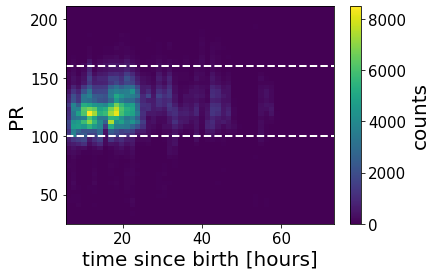

In [98]:
plt.hist2d(NP_delta_hours,NP_pr,bins=50)
plt.colorbar(label='counts')
plt.axhline(100,ls='dashed',lw=2,color='w')
plt.axhline(160,ls='dashed',lw=2,color='w')
plt.xlabel('time since birth [hours]')
plt.ylabel('PR')
plt.show()

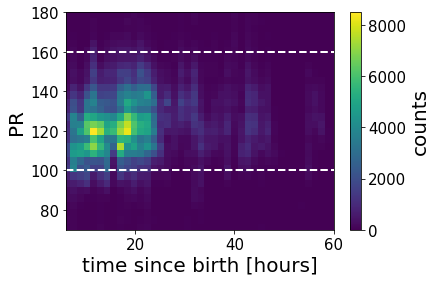

In [101]:
plt.hist2d(NP_delta_hours,NP_pr,bins=50)
plt.colorbar(label='counts')
plt.axhline(100,ls='dashed',lw=2,color='w')
plt.axhline(160,ls='dashed',lw=2,color='w')
plt.xlabel('time since birth [hours]')
plt.ylabel('PR')
plt.xlim(6,60)
plt.ylim(70,180)
plt.show()

In [4]:
plc044 = baby('PLC044')

G_PLC 044_Rt Leg_Day1.csv


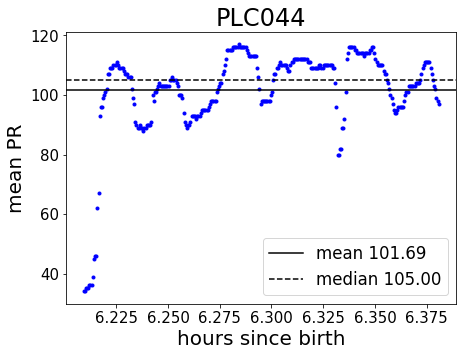

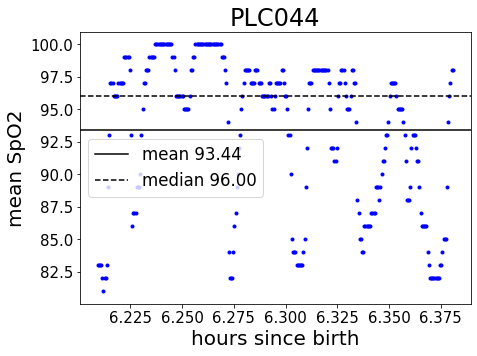

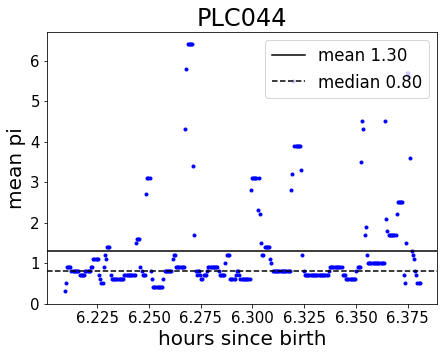

In [5]:
plc044.plot_baby_measurements(0)

G_PLC 044_Rt Wrist_Day1.csv


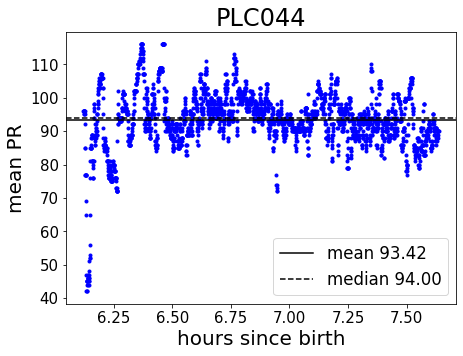

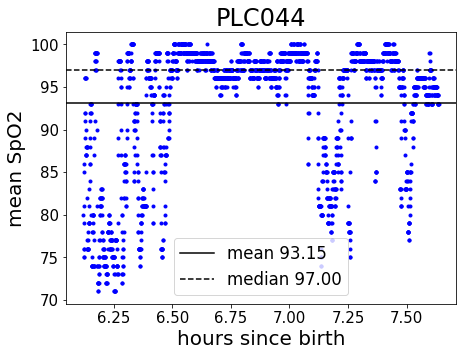

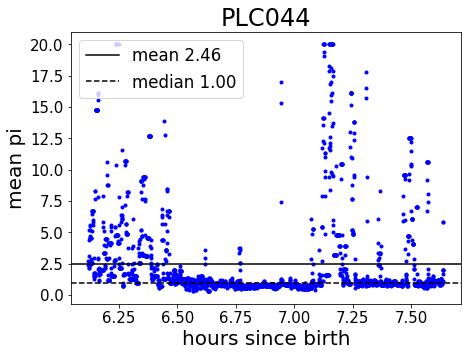

In [6]:
plc044.plot_baby_measurements(1)

In [10]:
plc044.measurements_delta_sec_since_birth

[22353, 22033]